In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from pathlib import Path

In [2]:
# Import data
filepath = Path("../results/peaks/peak_comparison.tsv")
peaks_df = pd.read_csv(filepath, delimiter="\t")
# Remove sequence spacers
peaks_df = peaks_df[~peaks_df.iloc[:, 0].str.startswith("sequences")]
# Reset index
peaks_df = peaks_df.reset_index(drop=True)
# Convert strings to integers
peaks_df[["seq1_unique", "seq2_unique", "overlap"]] = peaks_df[["seq1_unique", "seq2_unique", "overlap"]].apply(pd.to_numeric)
peaks_df

,sequences,seq1_unique,seq2_unique,overlap
0,SRR1642053/SRR1642051,9464,19685,38322
1,SRR1642054/SRR1642052,5981,4957,3130
2,SRR1642056/SRR1642057,2196,1128,419
3,SRR1642059/SRR1642058,2144,1247,1258
4,dmso/rif,2635,2708,2008


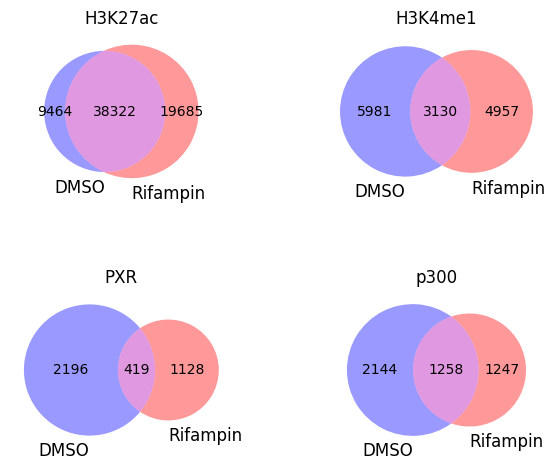

In [101]:
# Plot venn diagrams
fig, axes = plt.subplots(2, 2)
titles = ["H3K27ac", "H3K4me1", "PXR", "p300"]

for i in range(4):
    venn2(
        subsets=peaks_df.iloc[i, 1:],
        set_labels=("DMSO", "Rifampin"),
        set_colors=("b", "r"),
        ax=axes.flat[i])
    axes.flat[i].set_title(titles[i])
    
#plt.subplots_adjust(hspace=0.5, vspace=0.5)
plt.tight_layout(h_pad=5)
plt.savefig("overlap.png")

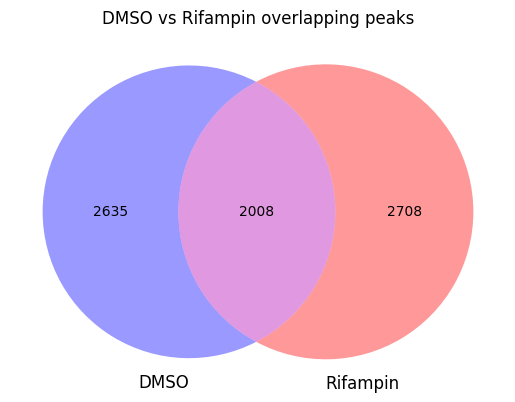

In [3]:
# Plot venn diagram of all overlapping peaks in DMSO condition vs rifampin condition
venn2(
    subsets=peaks_df.iloc[4, 1:],
    set_labels=("DMSO", "Rifampin"),
    set_colors=("b", "r"),
    )
plt.title("DMSO vs Rifampin overlapping peaks")
plt.savefig("overlap2.png")